In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf # Statsmodels - https://www.statsmodels.org/stable/index.html
from sklearn import linear_model # Scikit-Learn - https://scikit-learn.org/ 
import matplotlib.pyplot as plt

In [5]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
model = smf.ols('tip ~ total_bill', data=tips)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           6.69e-34
Time:                        23:56:39   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
results.params

Intercept     0.920270
total_bill    0.105025
dtype: float64

In [8]:
results.conf_int()

,0,1
Intercept,0.605622,1.234918
total_bill,0.090517,0.119532


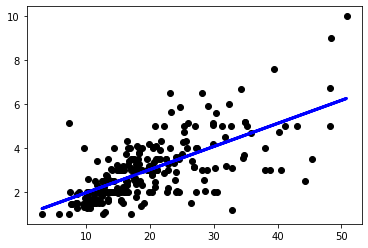

In [9]:
# Plot it
plt.scatter(tips['total_bill'], tips['tip'],color='black')
yPredicted = results.predict(tips['total_bill'])
plt.plot(tips['total_bill'], yPredicted, color='blue', linewidth=3)


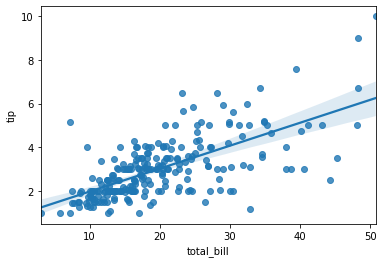

In [75]:
sns.regplot(x="total_bill", y="tip", data=tips);

In [76]:
# And then there is Scikit-learn

lr = linear_model.LinearRegression()
predicted = lr.fit(X=tips['total_bill'], y=tips['tip'])

ValueError: Expected 2D array, got 1D array instead:
array=[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.51 24.52 20.76 31.71
 10.59 10.63 50.81 15.81  7.25 31.85 16.82 32.9  17.89 14.48  9.6  34.63
 34.65 23.33 45.35 23.17 40.55 20.69 20.9  30.46 18.15 23.1  15.69 19.81
 28.44 15.48 16.58  7.56 10.34 43.11 13.   13.51 18.71 12.74 13.   16.4
 20.53 16.47 26.59 38.73 24.27 12.76 30.06 25.89 48.33 13.27 28.17 12.9
 28.15 11.59  7.74 30.14 12.16 13.42  8.58 15.98 13.42 16.27 10.09 20.45
 13.28 22.12 24.01 15.69 11.61 10.77 15.53 10.07 12.6  32.83 35.83 29.03
 27.18 22.67 17.82 18.78].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [77]:
# Previous error is due to the fact that sklearn is built to take numpy arrays. We didn't pass one. It's looking for 
# something of a very specific shape.

#tips['total_bill']
#tips['total_bill'].values
tips['total_bill'].values.reshape(-1, 1) # https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape
#tips['tip']

array([[16.99],
       [10.34],
       [21.01],
       [23.68],
       [24.59],
       [25.29],
       [ 8.77],
       [26.88],
       [15.04],
       [14.78],
       [10.27],
       [35.26],
       [15.42],
       [18.43],
       [14.83],
       [21.58],
       [10.33],
       [16.29],
       [16.97],
       [20.65],
       [17.92],
       [20.29],
       [15.77],
       [39.42],
       [19.82],
       [17.81],
       [13.37],
       [12.69],
       [21.7 ],
       [19.65],
       [ 9.55],
       [18.35],
       [15.06],
       [20.69],
       [17.78],
       [24.06],
       [16.31],
       [16.93],
       [18.69],
       [31.27],
       [16.04],
       [17.46],
       [13.94],
       [ 9.68],
       [30.4 ],
       [18.29],
       [22.23],
       [32.4 ],
       [28.55],
       [18.04],
       [12.54],
       [10.29],
       [34.81],
       [ 9.94],
       [25.56],
       [19.49],
       [38.01],
       [26.41],
       [11.24],
       [48.27],
       [20.29],
       [13.81],
       [

In [78]:
predicted = lr.fit(X=tips['total_bill'].values.reshape(-1, 1), y=tips['tip'])

# Note - there is no nice output. Why? StatsModels is for statisticians and provides good, usable output
# sklearn is more CS, bulit as functions to call and manipulate

print(predicted.coef_, predicted.intercept_)

[0.10502452] 0.9202696135546731


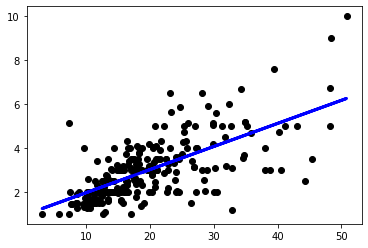

In [79]:
# Plot outputs
plt.scatter(tips['total_bill'], tips['tip'],  color='black')
yPredicted = predicted.predict(tips['total_bill'].values.reshape(-1, 1))
plt.plot(tips['total_bill'], yPredicted, color='blue', linewidth=3)

# Multiple Regression

In [80]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [81]:
model = smf.ols('tip ~ total_bill + size', data=tips).fit()
model.summary()

# The interpretations are exactly the same as before, although each parameter is interpreted “with all other variables held 
# constant.” That is, for every one unit increase (dollar) in total_bill, the tip increases by 0.09 (i.e., 9 cents) as long 
# as the size of the group does not change

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           9.67e-34
Time:                        17:14:16   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# With sklearn
lr = linear_model.LinearRegression()
predicted = lr.fit(tips[['total_bill', 'sex']], tips['tip'])

# How do we handle this error? Why does it occur?

ValueError: could not convert string to float: 'Female'

In [83]:
# It's a categorical variable!
# Statsmodel automatically creates dummy variables for you.
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None


In [84]:
model = smf.ols(formula='tip ~ total_bill + size + sex + smoker + day + time', data=tips).fit()
model.summary()

# The interpretation of these parameters are the same as before. However, our interpretation of categorical 
# variables must be stated in relation to the reference variable (i.e., the dummy variable that was dropped 
# from the analysis). For example, the coefficient for sex[T.Female] is 0.0324. We interpret this value in 
# relation to the reference value, Male; that is, we say that when the sex changes from Male to Female, the 
# tip increases by 0.324. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           1.20e-28
Time:                        17:14:17   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5908      0.256      2.310      0.022       0.087       1.095
sex[T.Female]      0.0324      0.142      0.229      0.819      -0.247       0.311
smoker[T.No]       0.0864      0.147      0.589      0.556      -0.202       0.375
day[T.Fri]         0.1623      0.393      0.412      0.680      -0.613       0.937
day[T.Sat]         0.0408      0.471      0.087      0.931      -0.886       0.968
day[T.Sun]         0.1368      0.472      0.290      0.772      -0.793       1.066
time[T.Dinner]    -0.0681      0.445     -0.153      0.878      -0.944       0.808
total_bill         0.0945      0.010      9.841      0.000       0.076       0.113
size               0.1760      0.090      1.966      0.051      -0.000       0.352
==============================================================================
Omnibus:                       27.860   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.555
Skew:                           0.607   Prob(JB):                     3.87e-12
Kurtosis:                       4.923   Cond. No.                         281.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# What's the reference variable? It's the one that's missing. For day.
tips.day.unique() # Thursday is missing from summary, so it's the reference

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [86]:
# With sklearn
lr = linear_model.LinearRegression()

#  http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
tips_dummy = pd.get_dummies(tips[['total_bill', 'size', 'sex', 'tip', 'smoker', 'day', 'time']])

In [87]:
tips_dummy.head()

,total_bill,size,tip,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,1.01,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1.66,1,0,0,1,0,0,0,1,0,1
2,21.01,3,3.50,1,0,0,1,0,0,0,1,0,1
3,23.68,2,3.31,1,0,0,1,0,0,0,1,0,1
4,24.59,4,3.61,0,1,0,1,0,0,0,1,0,1


In [88]:
# Can drop the reference variable as well
tips_dummy_ref = pd.get_dummies(tips[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']], drop_first=True)
tips_dummy_ref.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


In [89]:
lr = linear_model.LinearRegression()
predicted = lr.fit(X=tips_dummy_ref, y=tips['tip'])

print(predicted.coef_, "\n", predicted.intercept_)

[ 0.09448701  0.175992    0.03244094  0.08640832  0.1622592   0.04080082
  0.13677854 -0.0681286 ] 
 0.5908374259513764


In [90]:
# Make it look a little nicer

# get the intercept along with other coefficients
values = np.append(predicted.intercept_, predicted.coef_)

# get the names of the values
names = np.append('intercept', tips_dummy_ref.columns)

# put everything in a labeled dataframe
results = pd.DataFrame(values, index = names, columns=['coef'])

print(results)

                 coef
intercept    0.590837
total_bill   0.094487
size         0.175992
sex_Female   0.032441
smoker_No    0.086408
day_Fri      0.162259
day_Sat      0.040801
day_Sun      0.136779
time_Dinner -0.068129
